In [1]:
import torch
import matplotlib

/home/hht9zt/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
import pandas as pd

In [3]:
file = torch.load('ogbn_arxiv/processed/geometric_data_processed.pt')

In [11]:
data = file[0]

/tmp/ipykernel_331600/3972728863.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Year of Publication')


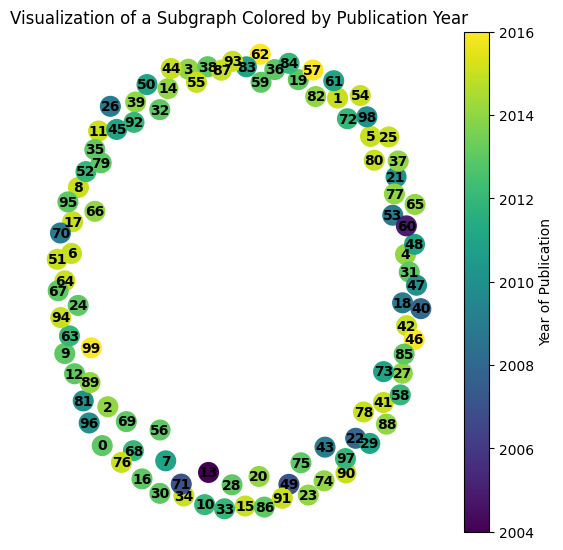

In [16]:
import torch
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.cm as cm

# Assuming the data object is already loaded as 'data'
# data.node_year is a tensor with shape [num_nodes, 1] representing the year of publication

# Convert edge_index to an adjacency list
edge_index = data.edge_index.numpy()
edges = [(edge_index[0, i], edge_index[1, i]) for i in range(edge_index.shape[1])]

# Create a NetworkX graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Visualize a subset of nodes (e.g., the first 100 nodes)
subgraph_nodes = np.arange(100)
H = G.subgraph(subgraph_nodes)

# Extract node year data and normalize it for color mapping
node_years = data.node_year.numpy()[subgraph_nodes].flatten()
norm = plt.Normalize(node_years.min(), node_years.max())
cmap = cm.viridis  # Choose a colormap (e.g., 'viridis', 'plasma', 'coolwarm')

# Map years to colors
node_colors = [cmap(norm(year)) for year in node_years]

# Draw the subgraph with node colors based on year
pos = nx.spring_layout(H)  # Positioning of nodes
plt.figure(figsize=(5, 5))
nx.draw(H, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=10, font_weight='bold', edge_color='gray')
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Year of Publication')
plt.title("Visualization of a Subgraph Colored by Publication Year")
plt.show()
